In [1]:
import os
from PIL import Image
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# General Cell that initializes the Module Path

Model_PATH = "dlib_trial_weights.dat"
frontalFaceDetector = dlib.get_frontal_face_detector()
faceLandmarkDetector = dlib.shape_predictor(Model_PATH)

In [3]:
def VideoFeed():
    
    cap = cv2.VideoCapture(0)
    
    while True:
        
        ret, frame = cap.read()
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        #Detecting Frontal Face
        faces_detected = frontalFaceDetector(img, 0)
        faces_count = len(faces_detected)
        
        if faces_count==0:
            continue
        
        allLandmarks = []
        
        # Iterating each faced detected
        for i in range(0, faces_count):
            rectangle = dlib.rectangle(int(faces_detected[i].left()), int(faces_detected[i].top()), int(faces_detected[i].right()), int(faces_detected[i].bottom()))
            landmarks = faceLandmarkDetector(img, rectangle)
            if landmarks.num_parts == 68:
                for j in range(0,68):
                    cv2.circle(img,(landmarks.part(j).x ,landmarks.part(j).y), 2, (0,255,0), -1)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imshow("Landmark",img)
        
        if(cv2.waitKey(2) == 13 & 0xFF):
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            break
    cap.release()
    cv2.destroyAllWindows()

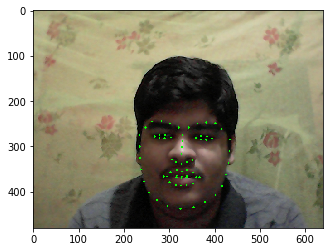

In [5]:
#VideoFeed()

In [4]:
def detect_landmark(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    faces_detected = frontalFaceDetector(img, 0)
    faces_count = len(faces_detected)
    
    allLandmarks = []
    
    if faces_count==0:
        return 0, allLandmarks, image
        
    for i in range(0, faces_count):
        rectangle = dlib.rectangle(int(faces_detected[i].left()), int(faces_detected[i].top()), int(faces_detected[i].right()), int(faces_detected[i].bottom()) )
        landmarks = faceLandmarkDetector(img, rectangle)
        
        if landmarks.num_parts == 68:
            flag = 1
            
            for j in range(0, 68):
                allLandmarks.append((landmarks.part(j).x, landmarks.part(j).y))
                cv2.circle(image,(landmarks.part(j).x ,landmarks.part(j).y), 2, (0,255,0), -1)
            break
        plt.imshow(image)
    return 1, allLandmarks, image

In [10]:
dataset = []

In [ ]:
main_dir = "front_trial"
neg = [0,0,0,0,0,0,0]
count = 0
for i, j, k in os.walk(main_dir):
    label = i.split('/')
    if len(label)==1:
        continue
    label_curr = int(label[1])
    for img in k:
        image = cv2.imread(i+"/"+img)
        count += 1
        
        val, landmark, img2 = detect_landmark(image)
        if val==0:
            neg[int(label_curr)]+=1
            continue

        img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
        cv2.imshow("Curr",image)
        
        cv2.waitKey()
        cv2.destroyAllWindows()
#         key_in = int(input())
        
#         if(key_in == 5):
#             cv2.destroyAllWindows()
#             break
#         else:
#             cv2.destroyAllWindows()
        
        dataset.append([landmark, label_curr])
    #break
    print(label_curr)
    print(count)

In [7]:
neg





[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
len(dataset)

14700

In [9]:
import pickle

with open('dataset_front_faces.pickle', 'wb') as output:
    pickle.dump(dataset, output)

13

In [ ]:
cv2.destroyAllWindows()